## Model Score 
97.85%
## Model Maximum Depth 
26

In [1]:

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text

from sklearn.metrics import accuracy_score

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [4]:
customer_df = pd.read_csv('../datasets/dm_train_t.csv')

In [5]:
customer_df

,id,n24_t,rev24_t,elpsdm_t_t_1,revlast_t_t_1,ordfreq,ordcat,response
0,1,0.693147,3.401197,0.000000,4.472136,1,6,1
1,2,3.218876,5.332719,0.000000,4.472136,1,6,0
2,3,1.609438,3.951244,0.000000,3.872983,1,6,0
3,4,2.397895,4.653960,0.000000,3.872983,1,6,0
4,5,0.693147,3.465736,0.000000,4.123106,1,6,0
...,...,...,...,...,...,...,...,...
1995,1996,2.484907,4.653960,3.178054,4.472136,2,6,0
1996,1997,3.583519,6.666957,3.178054,2.236068,2,6,0
1997,1998,1.945910,6.028279,3.178054,10.000000,1,7,0
1998,1999,1.609438,4.343805,3.178054,5.000000,1,7,0


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2000 non-null   int64  
 1   n24_t          2000 non-null   float64
 2   rev24_t        2000 non-null   float64
 3   elpsdm_t_t_1   2000 non-null   float64
 4   revlast_t_t_1  2000 non-null   float64
 5   ordfreq        2000 non-null   int64  
 6   ordcat         2000 non-null   int64  
 7   response       2000 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 125.1 KB


In [7]:
customer_df.isnull().any()

id               False
n24_t            False
rev24_t          False
elpsdm_t_t_1     False
revlast_t_t_1    False
ordfreq          False
ordcat           False
response         False
dtype: bool

In [8]:
customer_df.columns

Index(['id', 'n24_t', 'rev24_t', 'elpsdm_t_t_1', 'revlast_t_t_1', 'ordfreq',
       'ordcat', 'response'],
      dtype='object')

In [10]:
x_cols = ['n24_t', 'rev24_t', 'elpsdm_t_t_1', 'revlast_t_t_1', 'ordfreq', 'ordcat']

x = customer_df[x_cols]
y = customer_df['response']


In [11]:
tree_model = DecisionTreeClassifier(criterion='entropy')

In [12]:
%%time 
tree_model.fit(x, y)

Wall time: 262 ms


DecisionTreeClassifier(criterion='entropy')

In [13]:
train_predictions = tree_model.predict(x)

In [14]:
train_predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
pd.value_counts(train_predictions)

0    1455
1     545
dtype: int64

In [16]:
train_probability = tree_model.predict_proba(x)
train_probability

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [17]:
accuracy_score(y, train_predictions)

0.9785

In [18]:
tree_model.score(x, y)

0.9785

In [19]:
y.value_counts() / len(y)

0    0.708
1    0.292
Name: response, dtype: float64

[Text(0.5, 0.875, 'ordfreq <= 2.5\nentropy = 0.871\nsamples = 2000\nvalue = [1416, 584]'),
 Text(0.25, 0.625, 'n24_t <= 2.25\nentropy = 0.8\nsamples = 1345\nvalue = [1018, 327]'),
 Text(0.125, 0.375, 'rev24_t <= 4.324\nentropy = 0.749\nsamples = 860\nvalue = [676, 184]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'n24_t <= 3.827\nentropy = 0.875\nsamples = 485\nvalue = [342, 143]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'revlast_t_t_1 <= 2.737\nentropy = 0.966\nsamples = 655\nvalue = [398, 257]'),
 Text(0.625, 0.375, 'n24_t <= 1.498\nentropy = 0.997\nsamples = 245\nvalue = [130, 115]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'rev24_t <= 3.238\nentropy = 0.931\nsamples = 410\nvalue = [268, 142]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

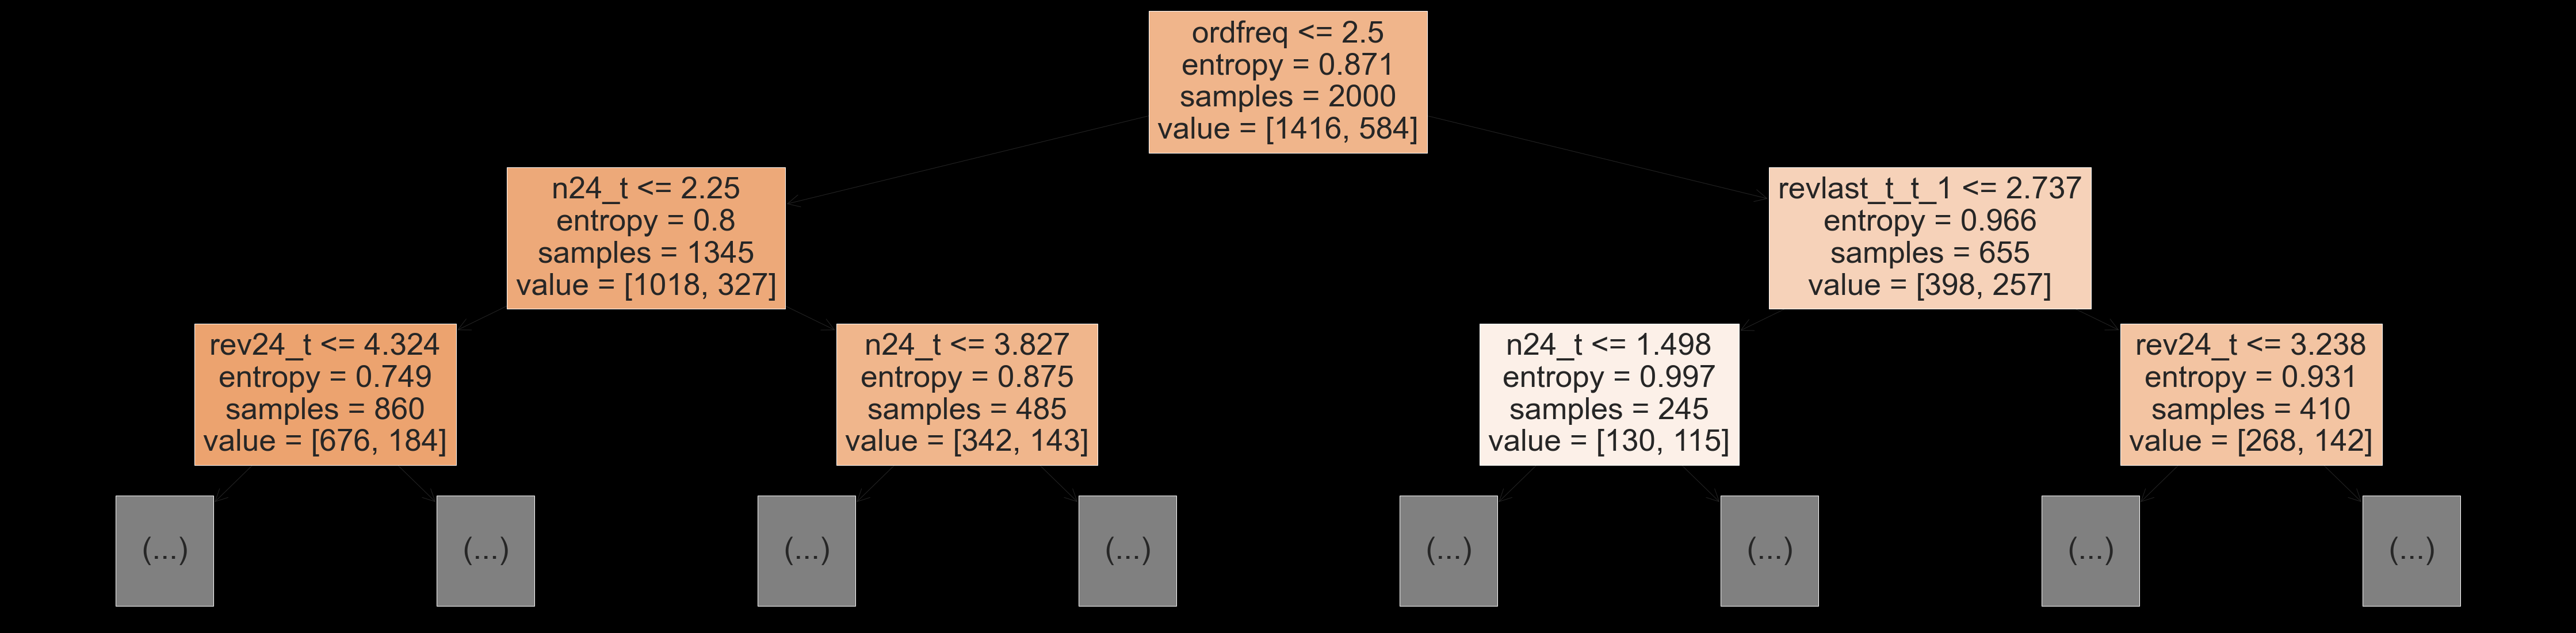

In [20]:
plt.figure(figsize=(80,20))
plot_tree(tree_model, feature_names=x.columns, max_depth=2, filled=True)

In [21]:
tree_model.tree_.max_depth

26

In [22]:
tree_text = export_text(tree_model, max_depth=10, feature_names=list(x.columns))
print(tree_text[:5000])

|--- ordfreq <= 2.50
|   |--- n24_t <= 2.25
|   |   |--- rev24_t <= 4.32
|   |   |   |--- revlast_t_t_1 <= 4.06
|   |   |   |   |--- elpsdm_t_t_1 <= 1.24
|   |   |   |   |   |--- n24_t <= 1.24
|   |   |   |   |   |   |--- rev24_t <= 3.70
|   |   |   |   |   |   |   |--- rev24_t <= 3.33
|   |   |   |   |   |   |   |   |--- n24_t <= 0.90
|   |   |   |   |   |   |   |   |   |--- rev24_t <= 3.11
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- rev24_t >  3.11
|   |   |   |   |   |   |   |   |   |   |--- elpsdm_t_t_1 <= 0.90
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- elpsdm_t_t_1 >  0.90
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- n24_t >  0.90
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- rev24_t >  3.33
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- rev24_t >  3.70
|   |

In [23]:
tree_model.feature_importances_

array([0.20873215, 0.38147743, 0.1955105 , 0.14253042, 0.05366441,
       0.01808509])